---
#  --------- **Lab Report 05** -----------
> ## **Name   : Muhammad Ehtisham Saleem**
> ## **Reg No : B22F1242AI108**
> ## **Lab : Digital Image Processing**
 >## **Submitted To : Rizwan Shah**
>## **Course Instructor : Dr. Abdul Jalil**
---

---



# **Image Processing Techniques for Enhanced Visual Quality in Various Applications**

## **Introduction**
> This lab task covers various image processing techniques that I applied to enhance image quality for specific applications. I explored methods such as bit-plane slicing, histogram processing, intensity transformations, and local histogram equalization. These techniques were used for tasks like document scanning, medical imaging, satellite imagery, night-time photo brightening, and wildlife photography. By utilizing libraries like OpenCV and NumPy, I gained practical insights into how these methods can address real-world imaging challenges.


---



## **Libraries Required**

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# **Scenario no 01 : Bit-Plane Slicing for Document Scanning**

## **Step 1: Load the Grayscale Image**

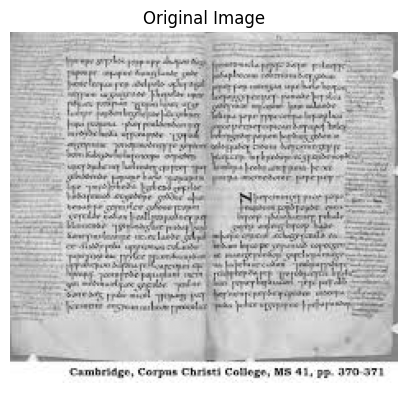

In [9]:
# Load the grayscale image
image = cv2.imread("Scanerio 01.png", cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
plt.show()


## **Explanation:**
* The scanned document is loaded as a grayscale image using cv2.imread().
* Grayscale images have pixel values ranging from 0 to 255, where each pixel is represented in 8 bits (binary format).

## **Step 2: Extract and Visualize All 8 Bit-Planes**

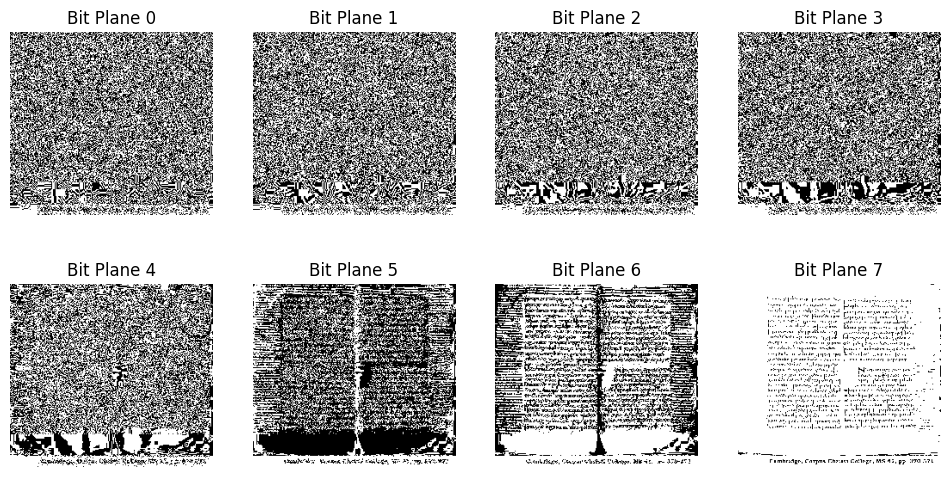

In [36]:
# Extract all 8 bit-planes
bit_planes = []
for i in range(8):
    bit_plane = (image >> i) & 1
    bit_planes.append(bit_plane * 255)

# Display all 8 bit-planes
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(bit_planes[i], cmap="gray")
    plt.title(f"Bit Plane {i}")
    plt.axis("off")

plt.show()


## **Explanation:**
* Each pixel in the grayscale image is represented in 8-bit binary  (e.g., 11010101).
* Bit-Plane Slicing extracts individual bits from the binary representation of each pixel.
* Higher bit-planes (6th, 7th, 8th) capture major details, whereas lower bit-planes (1st, 2nd) contribute to minor variations.

## **Step 3: Combine Higher-Order Bit Planes (5th, 6th, and 7th)**

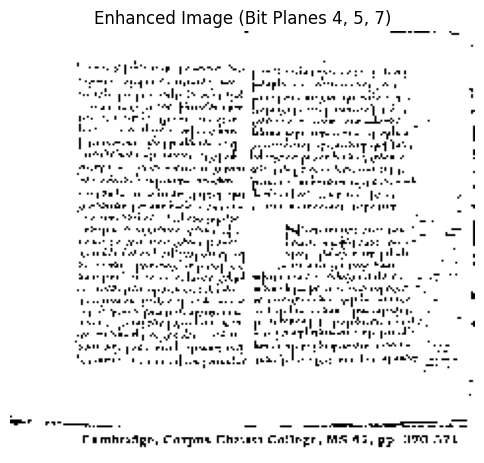

In [81]:
enhanced_image = bit_planes[4] + bit_planes[5] + bit_planes[7]
# Clip pixel values to ensure they stay within the valid range
enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)

# Display the enhanced image
plt.figure(figsize=(6, 6))
plt.imshow(enhanced_image, cmap="gray")
plt.title("Enhanced Image (Bit Planes 4, 5, 7)")
plt.axis("off")
plt.show()


## **Explanation:**
* Higher-order bit-planes capture the most important details, like text in documents.
* We sum bit-plane 5, 6, and 7 to enhance the readability.
* We add the 5th, 6th, and 7th bit-planes.
*  Convert to uint8 for proper image representation.

## **Step 4: Compare the Original Image and the Enhanced Image**

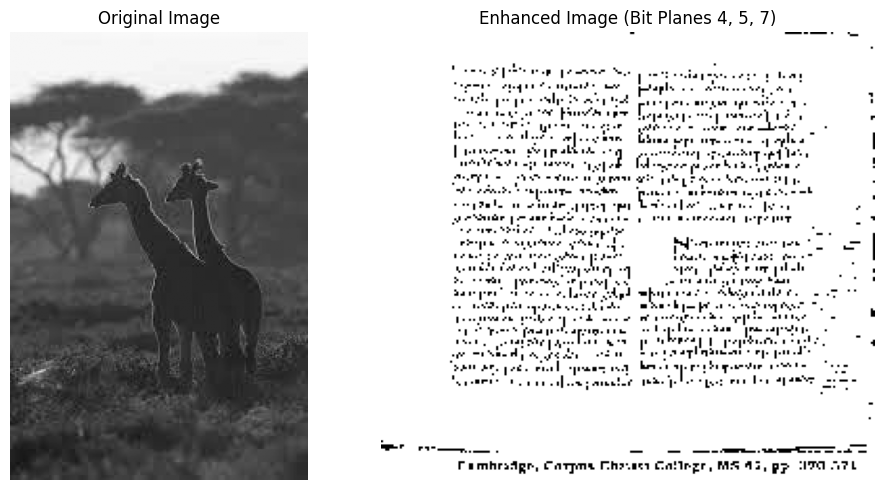

In [82]:
# Step 4: Display the original and enhanced images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap="gray")
plt.title("Enhanced Image (Bit Planes 4, 5, 7)")
plt.axis("off")

plt.tight_layout()
plt.show()


## **Explanation:**
* Visualize the original and enhanced images side-by-side to evaluate the improvement.
* The enhanced image should show clearer text by filtering out noise.


---



# **Scenario 02: Histogram Processing for Medical Imaging**
## **Objective:**
Analyze a medical image's intensity distribution to detect underexposure, overexposure, or a balanced state, then enhance the image using histogram stretching.

## **Step 1: Load the Grayscale Medical Image**

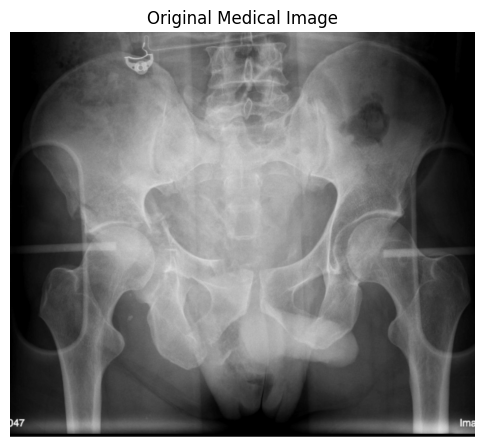

In [46]:
# Task 1: Load the grayscale medical image
image = cv2.imread("Scanerio 02.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Medical Image")
plt.axis("off")
plt.show()


## **Explanation:**

* The medical image is loaded using the cv2.imread() function with the cv2.IMREAD_GRAYSCALE flag to ensure it's read in grayscale.
* Grayscale images simplify intensity analysis since each pixel is represented by a single intensity value ranging from 0 to 255.
* The plt.imshow() function is used to display the original image without axis labels, providing a clear view of the medical scan.

## **Step 2: Plot the Histogram of the Image**

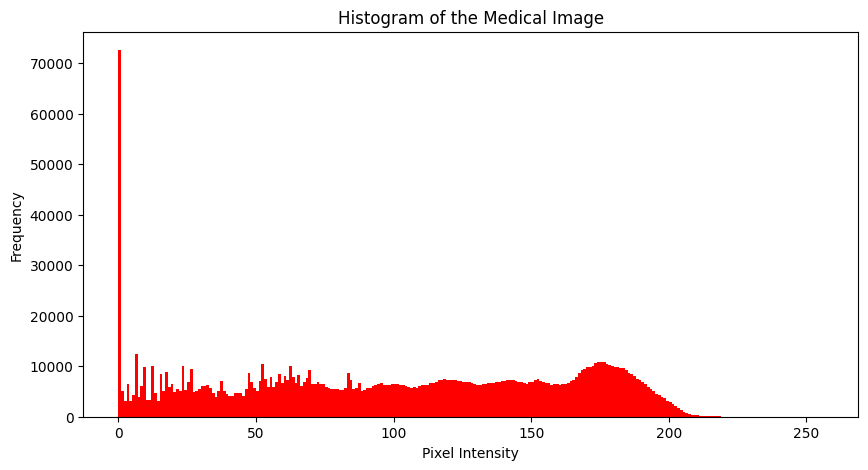

In [49]:

plt.figure(figsize=(10, 5))
plt.hist(image.ravel(), bins=256, range=(0, 256), color='red')
plt.title("Histogram of the Medical Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


## **Explanation:**

* The histogram is generated using plt.hist(), which counts pixel intensity frequencies.
* image.ravel() flattens the image into a one-dimensional array to simplify the histogram calculation.
* The histogram provides a visual representation of how pixel intensities are distributed, helping to identify if the image is underexposed, overexposed, or well-balanced.

## **Step 3: Analyze the Image Exposure**

Exposure Status: Well-Balanced


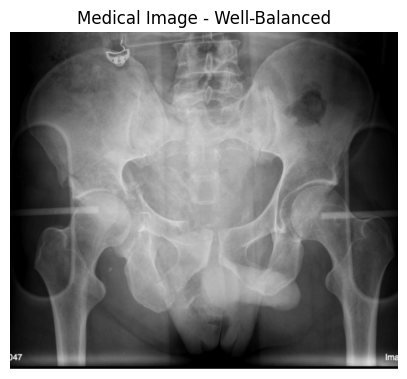

In [54]:
# Analyze histogram for exposure level
def analyze_exposure(image):
    mean_intensity = np.mean(image)
    if mean_intensity < 75:
        return "Underexposed (Too Dark)"
    elif mean_intensity > 180:
        return "Overexposed (Too Bright)"
    else:
        return "Well-Balanced"
exposure_status = analyze_exposure(image)
print(f"Exposure Status: {exposure_status}")

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title(f"Medical Image - {exposure_status}")
plt.axis("off")
plt.show()

## **Explanation:**

* The mean pixel intensity is calculated using np.mean().
* Based on predefined thresholds, the image is categorized as underexposed if the mean is below 75, overexposed if it's above 180, and well-balanced otherwise.
* Printing the exposure status helps understand the image's brightness characteristics before applying enhancement.

## **Step 4: Enhance the Image Using Histogram Stretching**

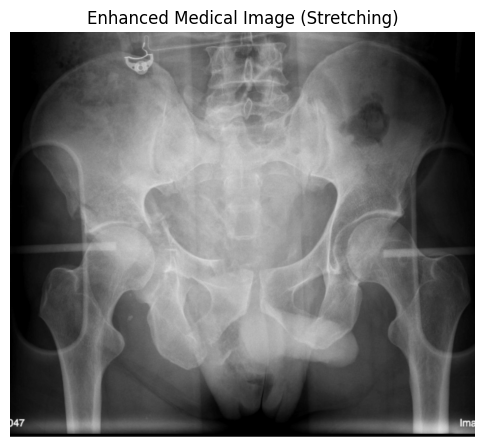

In [55]:
# Enhance the image using histogram stretching
def histogram_stretching(image):
    min_val, max_val = np.min(image), np.max(image)
    stretched = ((image - min_val) / (max_val - min_val)) * 255
    return stretched.astype(np.uint8)
enhanced_image = histogram_stretching(image)
plt.figure(figsize=(6, 6))
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced Medical Image (Stretching)")
plt.axis("off")
plt.show()

## **Explanation:**

* Histogram stretching improves contrast by scaling pixel intensities to the full 0–255 range.
* The formula (image - min_val) / (max_val - min_val) normalizes pixel values.
* Multiplying by 255 ensures that the new pixel intensities span the entire grayscale range, enhancing the image’s visibility.


## **Step 5: Display Original and Enhanced Images**

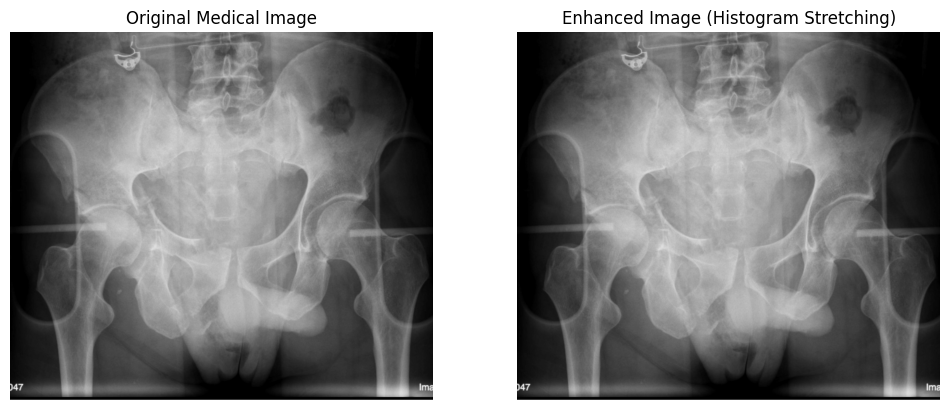

In [52]:
# Display original and enhanced images side-by-side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Medical Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced Image (Stretching)")
plt.axis("off")
plt.show()


## **Explanation:**

* The original and enhanced images are displayed side-by-side using plt.subplot() for better comparison.
* The original image shows the initial brightness distribution, while the enhanced image reflects the effect of histogram stretching.
* Observing both images together makes it easier to assess the improvements in visibility and contrast.


---



# **Scenario 03: Global Histogram Equalization for Satellite Imaging**

## **Objective:**
Enhance the contrast of satellite images affected by atmospheric conditions using global histogram equalization.

## **Step 1: Load the Grayscale Satellite Image**

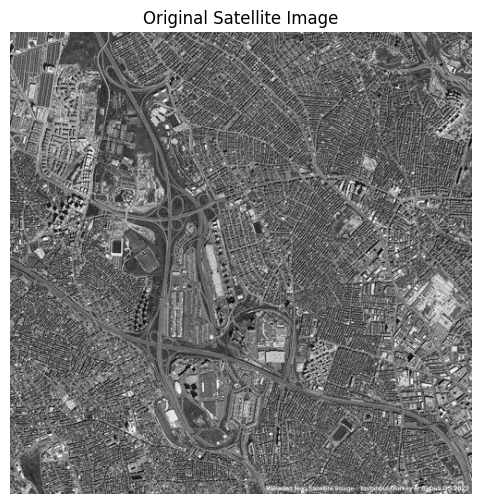

In [57]:
# Load the grayscale satellite image
image = cv2.imread('Scanerio 03.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original satellite image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Satellite Image")
plt.axis("off")
plt.show()


## **Explanation:**

* The satellite image is loaded using cv2.imread() with the cv2.IMREAD_GRAYSCALE flag to work with a single intensity channel.
* Grayscale images are essential for histogram equalization since the algorithm operates on intensity values.
* The plt.imshow() function is used to display the original image for visual inspection

## **Step 2: Apply Global Histogram Equalization**

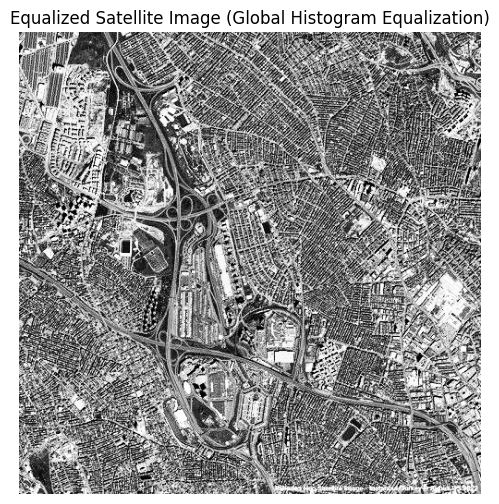

In [58]:
# Apply global histogram equalization
equalized_image = cv2.equalizeHist(image)
plt.figure(figsize=(6, 6))
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Satellite Image (Global Histogram Equalization)")
plt.axis("off")
plt.show()


## **Explanation:**

* Histogram equalization is applied using the cv2.equalizeHist() function.
* This method redistributes the pixel intensity values to enhance the contrast, making details more visible.
* The equalized image is displayed immediately to observe the improvement in contrast.

## **Step 3: Plot Histograms for Comparison**


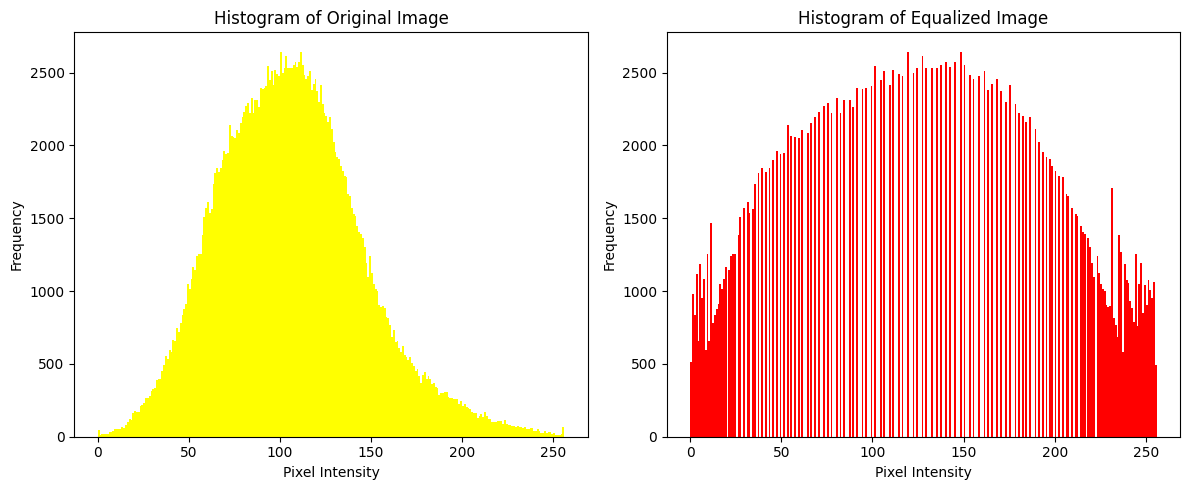

In [60]:
# Plot histograms of the original and equalized images
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='yellow')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='red')
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## **Explanation:**

* plt.hist() is used to plot the pixel intensity distributions of the original and equalized images.
* The original image typically shows a clustered distribution, while the equalized image exhibits a more spread-out histogram, indicating better contrast.
* The side-by-side comparison visually demonstrates the impact of histogram equalization.

## **Step 4: Compare Original and Equalized Images**

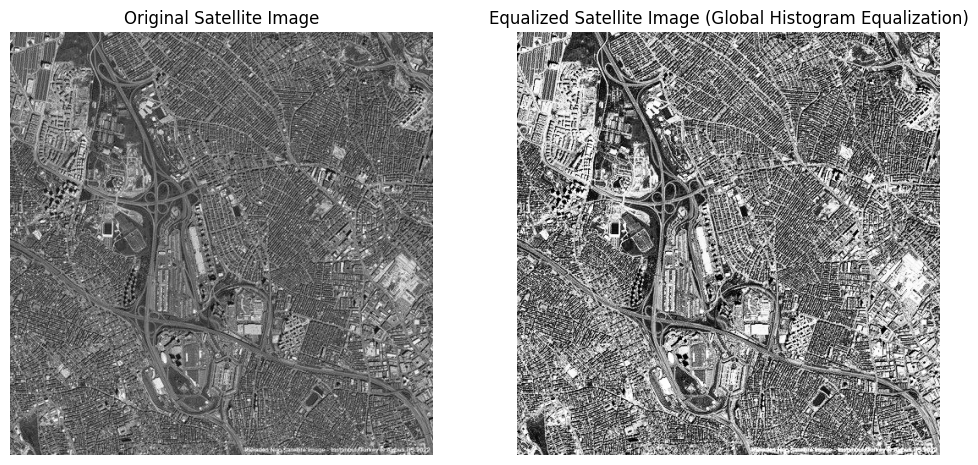

In [61]:
# Display the original and equalized images side-by-side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Satellite Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Satellite Image (Global Histogram Equalization)")
plt.axis("off")

plt.show()


# Explanation:

* The original and equalized images are displayed side-by-side for easy visual comparison.
* The equalized image typically shows improved contrast, making atmospheric details more distinct.
* Displaying both images together allows us to observe the effectiveness of the global histogram equalization technique.


---



# **Scenario 04: Transformation Functions for Night-Time Image Brightening**

## **Objective:**
Brighten a dark night-time image using logarithmic transformation and gamma correction.

## **Step 1: Load the Grayscale Night Time Image**

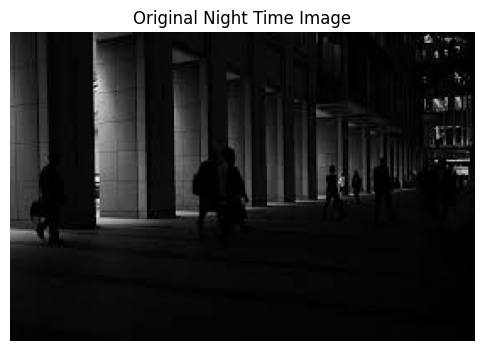

In [66]:
# Load the grayscale night-time image
image = cv2.imread('Scanerio 04.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Night Time Image")
plt.axis("off")
plt.show()


## **Explanation:**

* The image is loaded in grayscale using cv2.imread() to simplify the intensity transformation process.
* Grayscale images use a single intensity channel, which is essential for brightness adjustments.
* The plt.imshow() function displays the original dark image to visualize the initial condition.

## **Step 2: Apply Logarithmic Transformation**

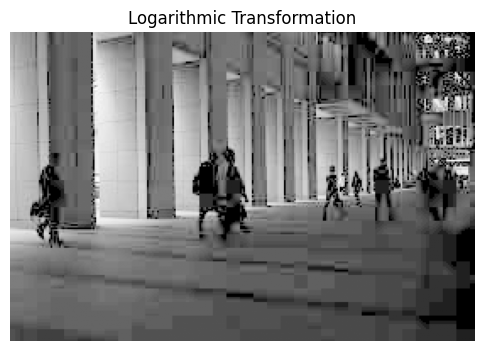

In [67]:
# Convert the image to float32 before applying logarithmic transformation
image_float = image.astype(np.float32)
log_transformed = cv2.normalize(np.log1p(image_float),
                                None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.figure(figsize=(6, 6))
plt.imshow(log_transformed, cmap='gray')
plt.title("Logarithmic Transformation")
plt.axis("off")
plt.show()


## **Explanation:**

* np.log1p() is applied to compress dark pixel values, enhancing details in darker areas.
* cv2.normalize() scales the transformed pixel values to the range [0, 255] to maintain display compatibility.
* The log transformation increases visibility in shadowy regions without significantly affecting brighter areas.

## **Step 3: Apply Gamma Correction**

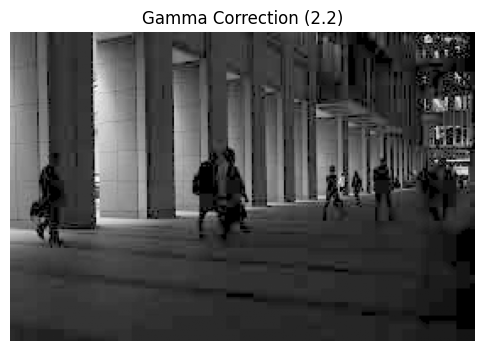

In [72]:
# Apply gamma correction with gamma = 2.1
gamma = 2.2
gamma_corrected = np.array(255 * (image / 255) ** (1 / gamma), dtype='uint8')
plt.figure(figsize=(6, 6))
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Gamma Correction ({gamma})")
plt.axis("off")
plt.show()


## **Step 4: Compare Original, Log-Transformed, and Gamma-Corrected Images**

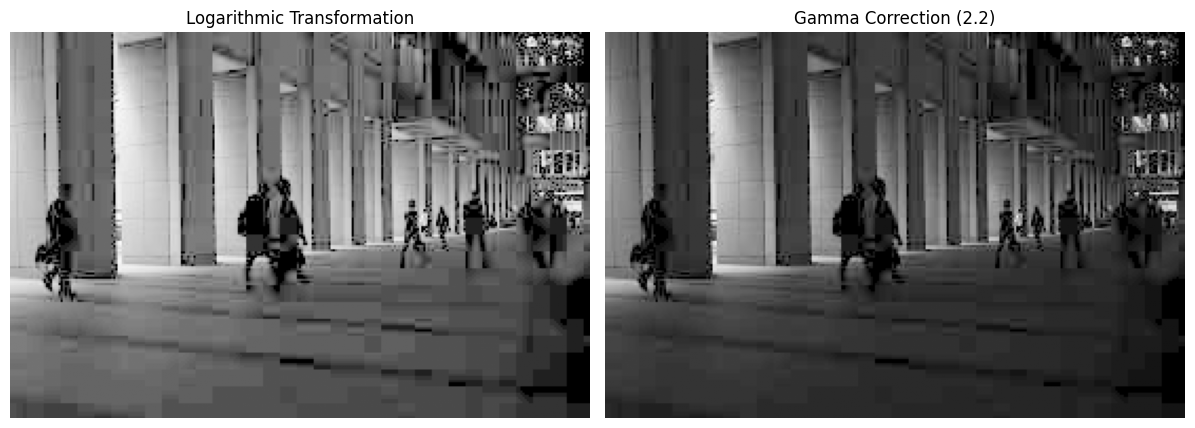

In [75]:
# Display original, log-transformed, and gamma-corrected images side-by-side
plt.figure(figsize=(18, 6))


# Logarithmic Transformation
plt.subplot(1, 3, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title("Logarithmic Transformation")
plt.axis("off")

# Gamma Correction
plt.subplot(1, 3, 3)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f"Gamma Correction ({gamma})")
plt.axis("off")

plt.tight_layout()
plt.show()


## **Explanation:**

* The original, log-transformed, and gamma-corrected images are displayed side-by-side for easy comparison.
* The log-transformed image reveals hidden details in dark regions, while gamma correction further enhances brightness.
* This comparative visualization helps in understanding the effects of different intensity transformation functions.

## **Scenario 05: Local Histogram Equalization for Wildlife Photography**


## **Objective:**
Enhance wildlife images taken under uneven lighting conditions using CLAHE (Contrast Limited Adaptive Histogram Equalization).

## **Step 1: Load the Wildlife Image in Grayscale**

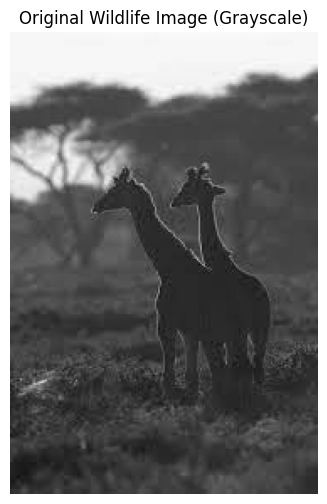

In [77]:
# Load the wildlife image in grayscale
image = cv2.imread('Scanerio 05.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Original Wildlife Image (Grayscale)")
plt.axis("off")
plt.show()


## **Explanation:**

* The image is loaded using cv2.imread() with the cv2.IMREAD_GRAYSCALE flag to simplify intensity analysis.
* Grayscale images help focus on contrast improvements without color distractions.

## **Step 2: Apply CLAHE (Local Histogram Equalization)**

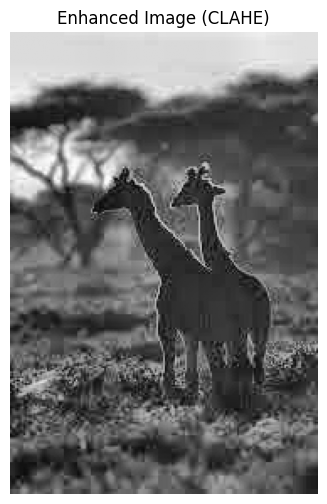

In [78]:
# Set CLAHE parameters
clip_limit = 3.0
tile_grid_size = (8, 8)

# Create CLAHE object and apply it to the image
clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
clahe_image = clahe.apply(image)

# Display the CLAHE-enhanced image
plt.figure(figsize=(6, 6))
plt.imshow(clahe_image, cmap='gray')
plt.title("Enhanced Image (CLAHE)")
plt.axis("off")
plt.show()


## **Explanation:**

* cv2.createCLAHE() is used to perform local histogram equalization.
* clipLimit prevents over-amplification of noise by limiting the contrast enhancement.
* tileGridSize divides the image into smaller regions, applying equalization to each.
* This technique enhances details in shadowed areas while maintaining overall brightness.

## **Step 3: Compare Original and Enhanced Images**

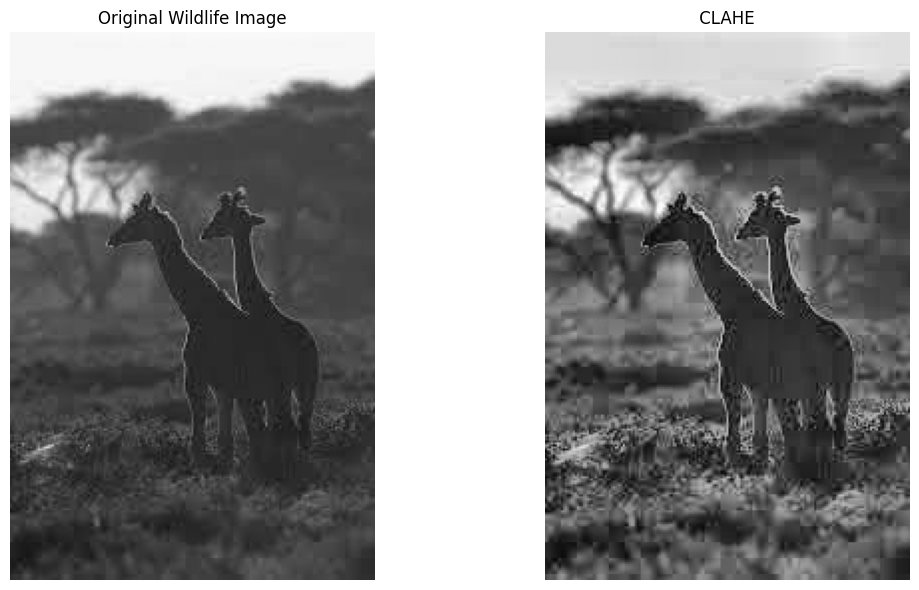

In [80]:
# Display the original and CLAHE-enhanced images side-by-side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Wildlife Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(clahe_image, cmap='gray')
plt.title(" CLAHE ")
plt.axis("off")

plt.tight_layout()
plt.show()


## **Explanation:**

* The original and CLAHE-enhanced images are displayed side-by-side for easy comparison.
* CLAHE enhances local contrast, revealing more texture in shadowed or unevenly lit regions.
* This step helps assess the effectiveness of the applied histogram equalization.


---



## **Conclusion**
> This lab task helped me understand and apply essential image processing techniques in different fields. I now know how to manipulate image brightness, contrast, and clarity to enhance images in real-world scenarios like medical imaging, satellite data, and wildlife photography.


---

